# Project 4, APS1070 Winter 2023
#### **Linear Regression -  15 points**
**Deadline: April 3rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Manish Kumar
*   Your **student number**: 1009645840

### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 6])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the critical temperature of a superconductor, as described in the paper below:

*Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354*

The following dataset contains 21263 instances, where each instance is a set of 81 features describing the superconductor's status. Our goal is to use these features to predict the `critical_temp` column, which is a setting that the design should take into account. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/superconduct.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets. **[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

**Answers**

---
3. The column of $1$s should not be added prior to standarization because the $1$s column will have mean of $1$ and variance $0$ and the stardardization operation on this column will result in a column populated with 'inf' due to divide by 0 variance which is not desired. In addition, python will spill the "runtimewarning" of divide by zero encountered. Therefore, bias column of $1$s should be added after standardization.

In [2]:
## importing modules required for the project
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [6]:
## defining standardization function 
def standardization(data, mu=0, sigma=0, calcMuSigma=True):
  data_ = data.copy()
  if calcMuSigma == True:
    mu,sigma = data_.mean(), data_.std()

  data_ -= mu
  data_ /= sigma
  
  return data_, mu, sigma

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(df.iloc[:,:-1], 
                                                      df.iloc[:,-1], test_size=0.2, 
                                                      random_state=1, shuffle=True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)

## performing standarization over training data
X_train_std, mu, sigma  = standardization(X_train)
X_valid_std,_,_         = standardization(X_valid, mu, sigma, calcMuSigma=False)

## adding first column of dataframe as bias in both training and valdation set
X_train_std.insert(0, "bias", np.ones(len(X_train_std))) 
X_valid_std.insert(0, "bias", np.ones(len(X_valid_std)))

X_train_std_np = np.array(X_train_std) ## numpy array of the data used for all computations
X_valid_std_np = np.array(X_valid_std) ## numpy array of the data used for all computations

In [9]:
X_train_std

,bias,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
15120,1.0,-0.769493,-1.255128,-0.547922,-0.801258,-0.138738,-0.375922,-0.947632,-1.274890,0.144806,...,0.762049,1.302320,0.814329,1.373291,-0.548305,-1.235421,-0.031611,2.199885,-0.046515,-0.316897
7435,1.0,0.616328,-0.518982,-0.520273,-0.417336,-0.633302,0.756365,0.151905,0.136688,-0.011249,...,-0.571852,-0.739181,-0.539236,-0.702912,0.686549,0.319571,-0.031611,-0.405893,-0.080488,-0.433643
17485,1.0,0.616328,-0.773049,0.087224,-0.822321,-0.037549,0.392947,0.296335,0.471862,0.192992,...,-0.381294,0.043668,-0.569620,-0.057144,0.507797,0.831763,1.578257,-0.281531,1.004103,1.055569
17662,1.0,-1.462403,-1.266026,-1.514390,-1.292741,-1.194200,-2.239478,-0.948420,-0.682060,-1.096290,...,-0.190737,-0.129867,-0.055650,-0.049225,-1.522225,-1.680348,-1.641478,0.673617,-1.728021,-1.476371
7829,1.0,0.616328,-0.285962,-0.605564,-0.366668,-0.642143,0.615648,0.905154,0.136688,-0.676549,...,-0.952966,-0.889336,-0.845929,-0.832626,0.760553,0.566620,-0.836544,-0.457454,-0.904255,-0.843241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1.0,-1.462403,-0.426805,0.216073,0.054256,0.543664,-1.349676,-1.268895,-1.514567,0.312329,...,-0.190737,0.154480,-0.218804,0.105192,-1.665707,-1.452489,-0.031611,0.548161,0.331395,0.584865
17289,1.0,-0.769493,0.487414,0.538709,0.593633,0.599055,-0.534555,-0.079451,0.079875,-0.222911,...,-0.190737,-0.338945,-0.165483,-0.361075,-0.590614,0.101537,-0.031611,-1.259290,-0.046515,0.340983
5192,1.0,-0.076583,0.194141,-0.559147,-0.096541,-0.619744,0.010534,0.684553,0.471862,-0.863108,...,-0.905327,-0.910426,-0.803689,-0.850528,0.189885,0.340251,-0.836544,-0.629575,-0.836268,-0.929637
12172,1.0,-1.462403,0.309470,0.706725,0.814536,1.036062,-1.285100,-0.933114,-2.071662,-0.828524,...,2.667622,2.379073,2.797152,2.494058,-1.522225,-0.951751,-1.641478,-0.901884,-1.728021,-1.476371


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
## rmse error calculate function
def rmse(y, y_pred):
  return mean_squared_error(y, y_pred, squared=False)

In [ ]:
## weights by analytical solution
W_ds = np.dot(sp.linalg.inv(np.dot(X_train_std_np.T, X_train_std_np)), 
              np.dot(X_train_std_np.T, y_train))

## prediction for trainig data and validation set
y_train_pred = np.dot(X_train_std_np, W_ds)
y_valid_pred = np.dot(X_valid_std_np, W_ds)

## mean squared error
rmse_train_ds = rmse(y_train, y_train_pred)
rmse_valid_ds = rmse(y_valid, y_valid_pred)

print(f"RMSE error for training set: {rmse_train_ds}")
print(f"RMSE error for validation set: {rmse_valid_ds}")

RMSE error for training set: 17.49502514032637
RMSE error for validation set: 17.8488358259337


## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

**Answers**

---
If the training RMSE is significantly lower than the validation RMSE, it suggests that the model is overfitting. On the other hand, if the training RMSE and validation RMSE are both high, it suggests that the model is underfitting. 

From the figure "RMSE vs. epoch" below it can be seen that after about 8000 epochs model performs well on both training and validation set with only 1.61% difference in RMSE values of training and validation set at convergence. Before 8000 epochs model can be categorized as underfitted as the RMSE value for both the training and validation set is high.


In [ ]:
## helper function to calculate gradients
def calc_gradient(X,y,t):
  diff = y - t.reshape(-1,1)
  gradient = (1/len(y)*np.dot(X.T, diff)).reshape(1,-1) # gradient
  return gradient

In [ ]:
## full batch gradient descent algortihms with momentum
def full_gd(X_tra, X_val, CT, lr=0.01, momentum=0):
  start_time        = time.time() ## Records current time
  rmse_train_array  = []
  rmse_valid_array  = []
  rmse_grad         = 10e5
  epoch             = 0
  change            = 0

  np.random.seed(5)
  W_gd = np.random.uniform(low=0, high=0.001, 
                          size=X_tra.shape[1]).reshape(1,-1)

  while rmse_grad>CT:
    y_train_pred  = np.dot(X_tra,W_gd.T).reshape(-1,1)
    y_valid_pred  = np.dot(X_val,W_gd.T).reshape(-1,1)
    rmse_train_array.append(rmse(y_train,y_train_pred))
    rmse_valid_array.append(rmse(y_valid,y_valid_pred))
    gradient      = calc_gradient(X_tra,y_train_pred,y_train) #calculate gradient
    new_change    = lr*gradient + momentum*change #step change using gradient descent with momentum
    W_gd          = W_gd - new_change # weights update
    change        = new_change
    rmse_grad     = rmse_valid_array[-1]
    if len(rmse_train_array)>1:
      if (rmse_train_array[-1]-rmse_train_array[-2])>1 or (rmse_valid_array[-1]-
                                                          rmse_valid_array[-2])>1:
        print("epoch: ", epoch, ': Not Converging')
        break
    epoch += 1

  training_time = (time.time() - start_time)

  return W_gd, rmse_train_array, rmse_valid_array, training_time 

In [ ]:
## checking the effect of momentum term in gradient descent
## not required for this project

# CT = 1.001*rmse_train_ds

# mom_optim_time = np.zeros(11)
# total_time     = np.zeros(11)
# for t in range(10):
#   for m in np.arange(0, 1.1, 0.1):
#     W_gd, rmse_train_gd, rmse_valid_gd, TT = full_gd(X_train_std_np, X_valid_std_np,
#                                                     CT, lr=0.01, momentum=m)
#     mom_optim_time[t] = TT
#   total_time += mom_optim_time

# average_time = total_time/(t+1)

# fig, ax = plt.subplots(nrows=1)
# ax.plot(np.arange(0, 1.1, 0.1), average_time)
# ax.set_xlabel("Momentum value")
# ax.set_ylabel("Average time to converge")
# fig.suptitle('Momentum Term Optimisation')
# plt.show()

In [ ]:
## calculate weights using full batch gradient descent
CT = 1.001*rmse_valid_ds
W_gd, rmse_train_gd, rmse_valid_gd, TT = full_gd(X_train_std_np, X_valid_std_np,
                                                 CT, lr=0.01, momentum=0.5)

# print("Weights: \n", W_gd)
print("--- Total Training Time: %s (s) ---" %(TT))

--- Total Training Time: 93.0361020565033 (s) ---


In [ ]:
percent_diff_rmse = ((rmse_valid_gd[-1] - rmse_train_gd[-1])/rmse_valid_gd[-1])*100
print(f'The difference between the final Validation set RMSE and Training set RMSE is {round(percent_diff_rmse,2)}%')

The difference between the final Validation set RMSE and Training set RMSE is 1.61%


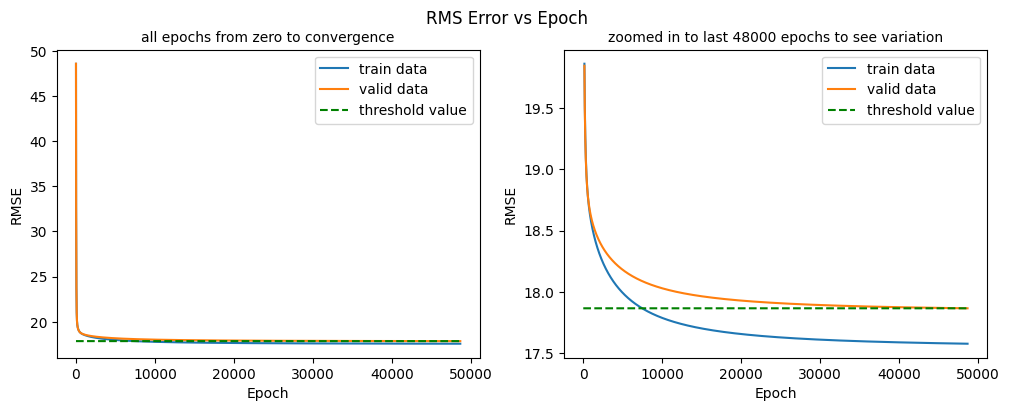

In [ ]:
epoch = np.arange(0, len(rmse_train_gd), 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,4])
ax[0].plot(rmse_train_gd, label='train data')
ax[0].plot(rmse_valid_gd, label='valid data')
ax[0].plot(CT*np.ones(len(rmse_train_gd)), 'g--', label ='threshold value')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("RMSE")
ax[0].legend(loc='upper right')
ax[0].set_title('all epochs from zero to convergence', size=10)

nx = 48500
ax[1].plot(epoch[-nx:], rmse_train_gd[-nx:], label='train data')
ax[1].plot(epoch[-nx:], rmse_valid_gd[-nx:], label='valid data')
ax[1].plot(CT*np.ones(len(rmse_train_gd[-nx:])), 'g--', label ='threshold value')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("RMSE")
ax[1].legend(loc='upper right')
ax[1].set_title('zoomed in to last 48000 epochs to see variation', size=10)

fig.suptitle('RMS Error vs Epoch')
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

**Answers**

---
From the figures below, the following conclusions are drawn:

Variation with mini-batch size:
1. Number of epochs to converge increases with the increase in mini-batch size and highest for full batch gradient descent.
2. Time take by the gradient descent algorithm increases with the increase in mini-batch size, from about 64s from mini-batch size of 256 samples to about 430s fro mini-batch size of 4096 samples.
3. For a given learning rate, there is minimum size of mini-batch that converges, below that there is no convergence (from part 4). To use lower mini-batch sizes we need to reduce the learning rate (from part 5).



In [ ]:
## creating mini batches
def create_mini_batches(X, y, batch_size=1):
    mini_batches = []
    y = y.reshape(-1,1)
    data = np.hstack((X, y))
    np.random.permutation(data)  ## shuffle entire data
    n_minibatches = data.shape[0] // batch_size
    idx = 0
 
    for idx in range(n_minibatches):
        mini_batch = data[idx*batch_size:(idx + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))

    # if data.shape[0] % batch_size != 0:
    #     mini_batch = data[idx*batch_size:data.shape[0]]
    #     X_mini = mini_batch[:, :-1]
    #     Y_mini = mini_batch[:, -1].reshape((-1, 1))
    #     mini_batches.append((X_mini, Y_mini))

    return mini_batches

In [ ]:
def stocastic_gd(X_tra, X_val, batch_size, CT, lr=0.01, momentum=0):
  start_time        = time.time() ## Records current time
  rmse_train_array  = []
  rmse_valid_array  = []
  elapse_time_array = []
  rmse_grad         = 10e5
  epoch             = 0
  change            = 0

  np.random.seed(10)
  W_sgd = np.random.uniform(low=0, high=0.001, 
                          size=X_tra.shape[1]).reshape(1,-1)

  while rmse_grad>CT:
    mini_batches = create_mini_batches(X_tra, y_train, batch_size)
    mini_batch_itr  = 0
    dum_arr         = []
    for mini_batch in mini_batches:
      mini_batch_itr     += 1
      X_mini, y_mini      = mini_batch
      y_train_mini_pred   = np.dot(X_mini,W_sgd.T).reshape(-1,1)
      gradient            = calc_gradient(X_mini,y_train_mini_pred,y_mini) #calculate gradient
      new_change          = lr*gradient + momentum*change #step change using gradient descent with momentum
      W_sgd               = W_sgd - new_change # weights update
    y_train_pred  = np.dot(X_tra,W_sgd.T).reshape(-1,1)
    y_valid_pred  = np.dot(X_val,W_sgd.T).reshape(-1,1)
    rmse_train_array.append(rmse(y_train,y_train_pred))
    rmse_valid_array.append(rmse(y_valid,y_valid_pred))
    rmse_grad     = rmse_valid_array[-1]
    elapse_time_array.append(time.time() - start_time)
    epoch += 1

    ## check if diverging
    num_of_elem_check = 20
    if len(rmse_valid_array)>=num_of_elem_check+1:
      if (rmse_valid_array[-1]-rmse_valid_array[-2])>0:
        for jdx in range(1, num_of_elem_check+1):
          dum_arr.append(rmse_valid_array[-jdx]-rmse_valid_array[-jdx-1]>0.0)
    if sum(dum_arr) == num_of_elem_check:
      print("epoch: ", epoch, "mini_batch size: ", batch_size, ': Not Converging')
      break
    
  return W_gd, rmse_train_array, rmse_valid_array, elapse_time_array 

In [ ]:
CT = 1.001*rmse_valid_ds

batch_sizes             = []
batch_sizes_notConverge = []
batch_sizes_Converge    = []

## batch sizes computation
for i in range(1, 13):
  batch_sizes.append(2**i)

batchSize_sweep_dict = {}
for batch_size in batch_sizes:
  W_sgd, rmse_train_sgd, rmse_valid_sgd, TTarr = stocastic_gd(X_train_std_np, 
                                                              X_valid_std_np, 
                                                              batch_size, 
                                                              CT, lr=0.01, 
                                                              momentum=0.5)
  if rmse_valid_sgd[-1]> CT:
    batch_sizes_notConverge.append(batch_size) # not converged batch sizes
  else:
    batch_sizes_Converge.append(batch_size) # converged batch sizes

  print('--- Case Completed ---')
  batchSize_sweep_dict[batch_size] = {'weights': W_sgd,
                                      'rmse_train_sgd': rmse_train_sgd,
                                      'rmse_valid_sgd': rmse_valid_sgd,
                                      'TTarr': TTarr} # collecting data for ploting


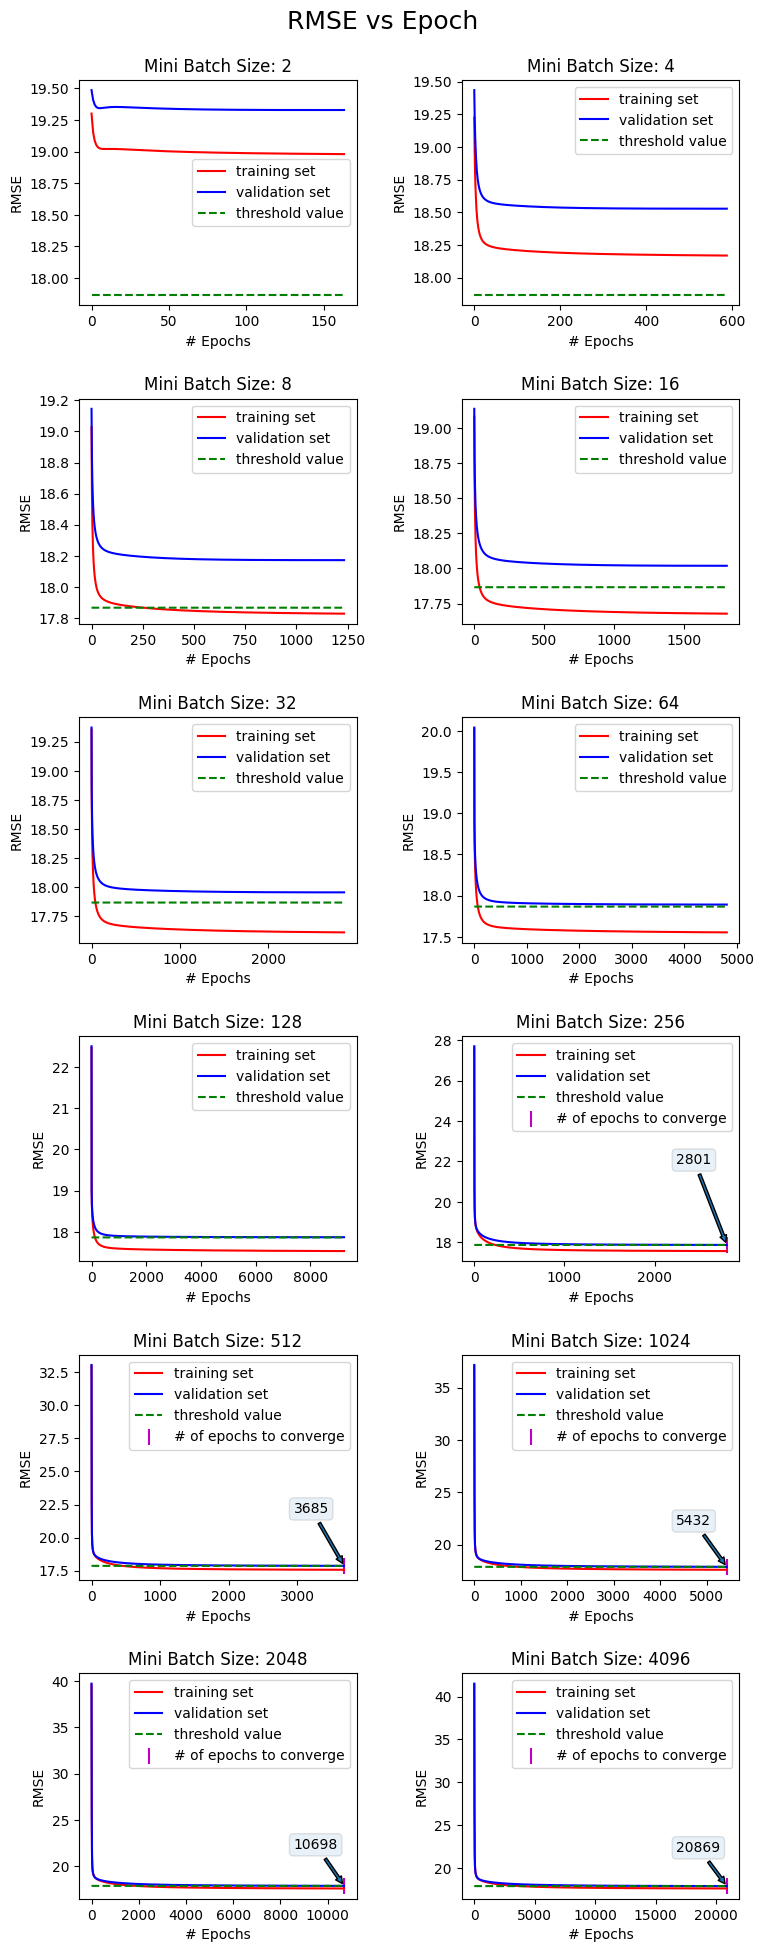

In [ ]:
keys = list(batchSize_sweep_dict.keys())

## Plotting RMSE vs Epoch
## number of epochs marked only for converged cases
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[8,20])
for i, ax in enumerate(axes.flatten()):
  rmse_train_ = batchSize_sweep_dict[keys[i]]['rmse_train_sgd']
  rmse_valid_ = batchSize_sweep_dict[keys[i]]['rmse_valid_sgd']
  ax.plot(rmse_train_, color='red', label ='training set')
  ax.plot(rmse_valid_, color='blue', label ='validation set')
  ax.plot(CT*np.ones(len(rmse_train_)), 'g--', label ='threshold value')
  if keys[i] in batch_sizes_Converge: ## mark total time for converged cases
    ax.scatter(len(rmse_valid_), rmse_valid_[-1], marker='|', color='m', 
              s=120, label='# of epochs to converge')
    ax.annotate(str(len(rmse_valid_)), (len(rmse_valid_), rmse_valid_[-1]), 
                xytext=(len(rmse_valid_)*(1-1/5),rmse_valid_[-1]+4), 
                bbox=dict(boxstyle="round", alpha=0.1), 
                arrowprops = dict(arrowstyle="simple"))
    
  ax.set_title(f'Mini Batch Size: {keys[i]}', size=12)
  ax.set_xlabel('# Epochs')
  ax.set_ylabel('RMSE')
  ax.legend()
fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2)
fig.suptitle('RMSE vs Epoch', size=18)
fig.show()

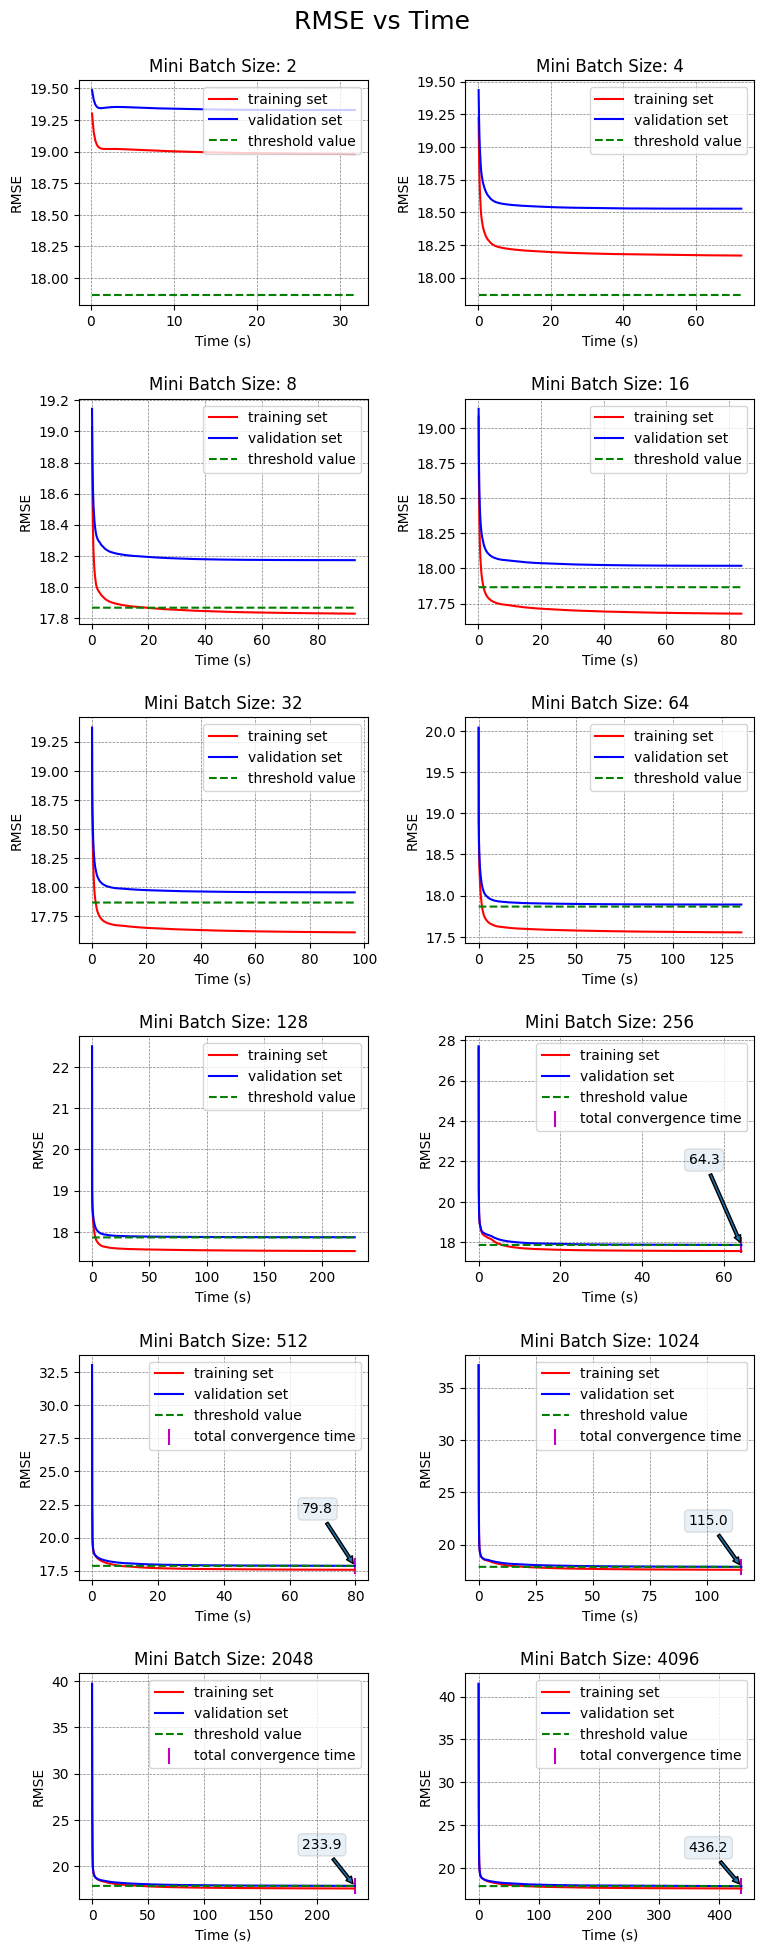

In [ ]:
## Plotting RMSE vs time
## time is marked only for converged cases 
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=[8,20])
for i, ax in enumerate(axes.flatten()):
  rmse_train_ = batchSize_sweep_dict[keys[i]]['rmse_train_sgd']
  rmse_valid_ = batchSize_sweep_dict[keys[i]]['rmse_valid_sgd']
  time_       = batchSize_sweep_dict[keys[i]]['TTarr']
  ax.plot(time_,rmse_train_, color='red', label ='training set')
  ax.plot(time_,rmse_valid_, color='blue', label ='validation set')
  ax.plot(time_, CT*np.ones(len(time_)), 'g--', label ='threshold value')
  if keys[i] in batch_sizes_Converge: ## mark total time for converged cases
    ax.scatter(time_[-1], rmse_valid_[-1], marker='|', color='m', 
              s=120, label='total convergence time')
    ax.annotate(str(round(time_[-1],1)), (time_[-1], rmse_valid_[-1]), 
                xytext=(time_[-1]*(1-1/5), rmse_valid_[-1]+4), 
                bbox=dict(boxstyle="round", alpha=0.1), 
                arrowprops = dict(arrowstyle="simple"))
  ax.set_title(f'Mini Batch Size: {keys[i]}', size=12)
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('RMSE')
  ax.legend(loc='upper right')
  ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2)
fig.suptitle('RMSE vs Time', size=18)
fig.show()

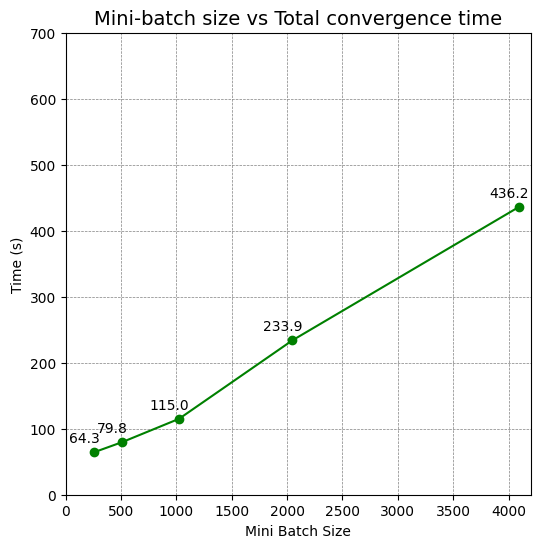

In [ ]:
## Plotting total training time vs batch size
## only converged cases are plotted 
fig, ax = plt.subplots(nrows=1, figsize=[6,6])
time_       = []
mini_batch_ = []
labels      = []
for i in range(len(keys)):
  if keys[i] in batch_sizes_Converge:
    time_.append(round(batchSize_sweep_dict[keys[i]]['TTarr'][-1],1))
    mini_batch_.append(keys[i])
    labels.append(str(time_[-1]))

ax.plot(mini_batch_, time_, marker='o', color='green')
for x,y,label in zip(mini_batch_,time_, labels):
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(-7,+7), 
                 ha='center')
ax.set_title('Mini-batch size vs Total convergence time', size=14)
ax.set_xlabel('Mini Batch Size')
ax.set_ylabel('Time (s)')
ax.set_xlim([0, 4200])
ax.set_ylim([0, 700])
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
fig.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

**Answers**

---
From the figures below, the following conclusions are drawn:

Variation with learning rate:
1. Number of epochs to converge increases with the decrease in learning rate. About 146000 epochs with learning rate 0.0001 and about 2800 epochs with learning rate 0.01 for the mini-batch size of 256 samples.
2. Time take by the gradient descent algorithm increases with the decrease in learning rate.About 3800s with learning rate 0.0001 and about 60s with learning rate 0.01 for the mini-batch size of 256 samples.

In [ ]:
learning_rates = [1e-2, (1e-2+1e-3)/2, 1e-3, 
                  (1e-3+1e-4)/2, 1e-4]
table_df = pd.DataFrame(columns = ['batch size', 'learing rate', 
                                   'training RMSE', 'validation RMSE', 
                                   'converged'])

d_dict_list = []
for lr in learning_rates:
  print('learning rate:', lr)
  batchConver_list = []
  for batch_size in batch_sizes_notConverge[-3:]:
    W_sgd, rmse_train_sgd, rmse_valid_sgd, TTarr = stocastic_gd(X_train_std_np, 
                                                                X_valid_std_np, 
                                                                batch_size, 
                                                                CT, lr, 
                                                                momentum=0.5)
    
    
    if rmse_valid_sgd[-1]> CT:
      print('--batch_size:',batch_size,'--learning rate:',lr,'--not converged--')
      break
    else:
      print('--batch_size:',batch_size,'--learning rate:',lr,'--converged--')
      d = {'batch size': batch_size, 
            'learing rate': lr, 
            'training RMSE': rmse_train_sgd[-1], 
            'validation RMSE': rmse_valid_sgd[-1], 
            'converged': 'Y'}
      d_dict_list.append(d)
      batchConver_list.append(batch_size)
      table_df.loc[len(table_df)] = d

  if len(batchConver_list) == 3:
    print('Learning rate for convergence:', lr)
    break

learning rate: 0.01
epoch:  2857 mini_batch size:  32 : Not Converging
--batch_size: 32 --learning rate: 0.01 --not converged--
learning rate: 0.0055
epoch:  4790 mini_batch size:  32 : Not Converging
--batch_size: 32 --learning rate: 0.0055 --not converged--
learning rate: 0.001
--batch_size: 32 --learning rate: 0.001 --converged--
--batch_size: 64 --learning rate: 0.001 --converged--
--batch_size: 128 --learning rate: 0.001 --converged--
Learning rate for convergence: 0.001


In [ ]:
table_df

,batch size,learing rate,training RMSE,validation RMSE,converged
0,32,0.001,17.562883,17.866682,Y
1,64,0.001,17.571792,17.866681,Y
2,128,0.001,17.575411,17.866683,Y


In [ ]:
learning_rates2 = np.linspace(1e-4, 1e-2, 10)

table_df2 = pd.DataFrame(columns = ['batch size', 'learing rate', 
                                    'training RMSE', 'validation RMSE', 
                                    'converged'])

learningRate_sweep_dict = {}
batch_size = 256
for lr in learning_rates2:
  W_sgd, rmse_train_sgd, rmse_valid_sgd, TTarr = stocastic_gd(X_train_std_np, 
                                                              X_valid_std_np, 
                                                              batch_size, 
                                                              CT, lr, 
                                                              momentum=0.5)
  if rmse_valid_sgd[-1]> CT:
    print('--batch_size:',batch_size,'--learning rate:',lr,'--not converged--')
    d = {'batch size': batch_size, 
          'learing rate': lr, 
          'training RMSE': rmse_train_sgd[-1], 
          'validation RMSE': rmse_valid_sgd[-1], 
          'converged': 'N'}
  else:
    print('--batch_size:',batch_size,'--learning rate:',lr,'--converged--')
    d = {'batch size': batch_size, 
          'learing rate': lr, 
          'training RMSE': rmse_train_sgd[-1], 
          'validation RMSE': rmse_valid_sgd[-1], 
          'converged': 'Y'}

  table_df2.loc[len(table_df2)] = d
  learningRate_sweep_dict[lr] = {'weights': W_sgd,
                                  'rmse_train_sgd': rmse_train_sgd,
                                  'rmse_valid_sgd': rmse_valid_sgd,
                                  'TTarr': TTarr} # collecting data for ploting


--batch_size: 256 --learning rate: 0.0001 --converged--
--batch_size: 256 --learning rate: 0.0012000000000000001 --converged--
--batch_size: 256 --learning rate: 0.0023 --converged--
--batch_size: 256 --learning rate: 0.0034 --converged--
--batch_size: 256 --learning rate: 0.0045000000000000005 --converged--
--batch_size: 256 --learning rate: 0.005600000000000001 --converged--
--batch_size: 256 --learning rate: 0.0067 --converged--
--batch_size: 256 --learning rate: 0.0078000000000000005 --converged--
--batch_size: 256 --learning rate: 0.0089 --converged--
--batch_size: 256 --learning rate: 0.01 --converged--


In [ ]:
table_df2

,batch size,learing rate,training RMSE,validation RMSE,converged
0,256,0.0001,17.578765,17.866684,Y
1,256,0.0012,17.577049,17.866683,Y
2,256,0.0023,17.574959,17.866682,Y
3,256,0.0034,17.573044,17.866684,Y
4,256,0.0045,17.571357,17.866682,Y
5,256,0.0056,17.569837,17.866680,Y
6,256,0.0067,17.568415,17.866684,Y
7,256,0.0078,17.566968,17.866677,Y
8,256,0.0089,17.565423,17.866682,Y
9,256,0.0100,17.563639,17.866681,Y


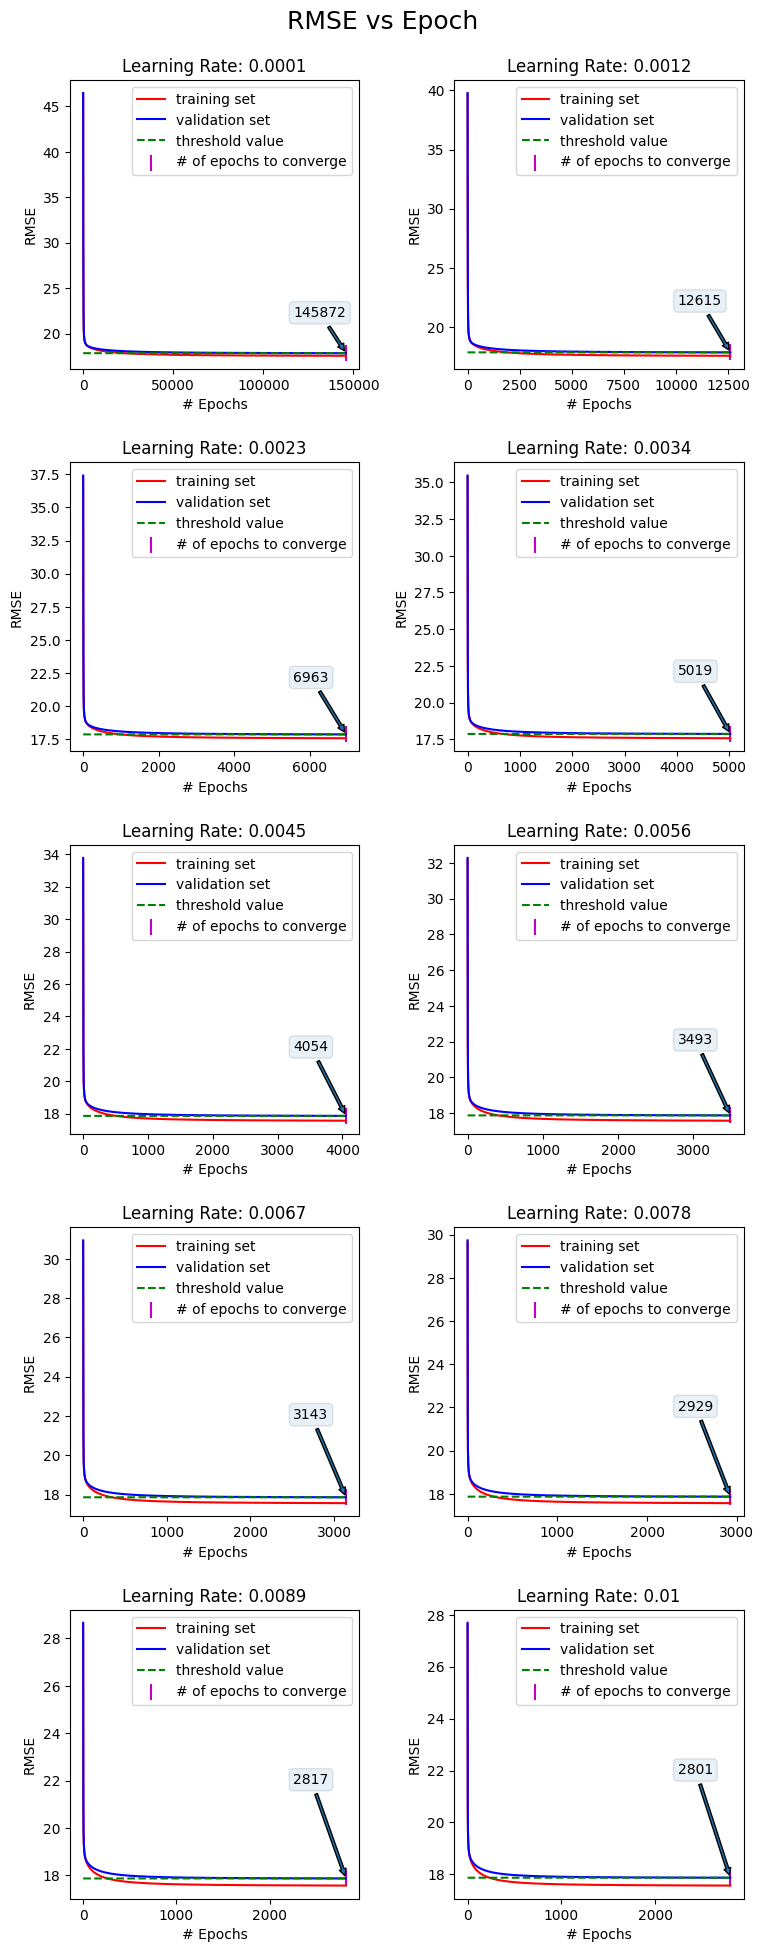

In [ ]:
keys = list(learningRate_sweep_dict.keys())
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[8,20])

for i, ax in enumerate(axes.flatten()):
  rmse_train_ = learningRate_sweep_dict[keys[i]]['rmse_train_sgd']
  rmse_valid_ = learningRate_sweep_dict[keys[i]]['rmse_valid_sgd']
  ax.plot(rmse_train_, color='red', linestyle='-',
          label ='training set')
  ax.plot(rmse_valid_, color='blue', label ='validation set')
  ax.plot(CT*np.ones(len(rmse_train_)), 'g--', label ='threshold value')
  ax.scatter(len(rmse_valid_), rmse_valid_[-1], marker='|', color='m', 
            s=120, label='# of epochs to converge')
  ax.annotate(str(len(rmse_valid_)), (len(rmse_valid_), rmse_valid_[-1]), 
              xytext=(len(rmse_valid_)*(1-1/5),rmse_valid_[-1]+4), 
              bbox=dict(boxstyle="round", alpha=0.1), 
              arrowprops = dict(arrowstyle="simple"))
    
  ax.set_title(f'Learning Rate: {round(keys[i], 4)}', size=12)
  ax.set_xlabel('# Epochs')
  ax.set_ylabel('RMSE')
  ax.legend()
fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2)
fig.suptitle('RMSE vs Epoch', size=18)
fig.show()

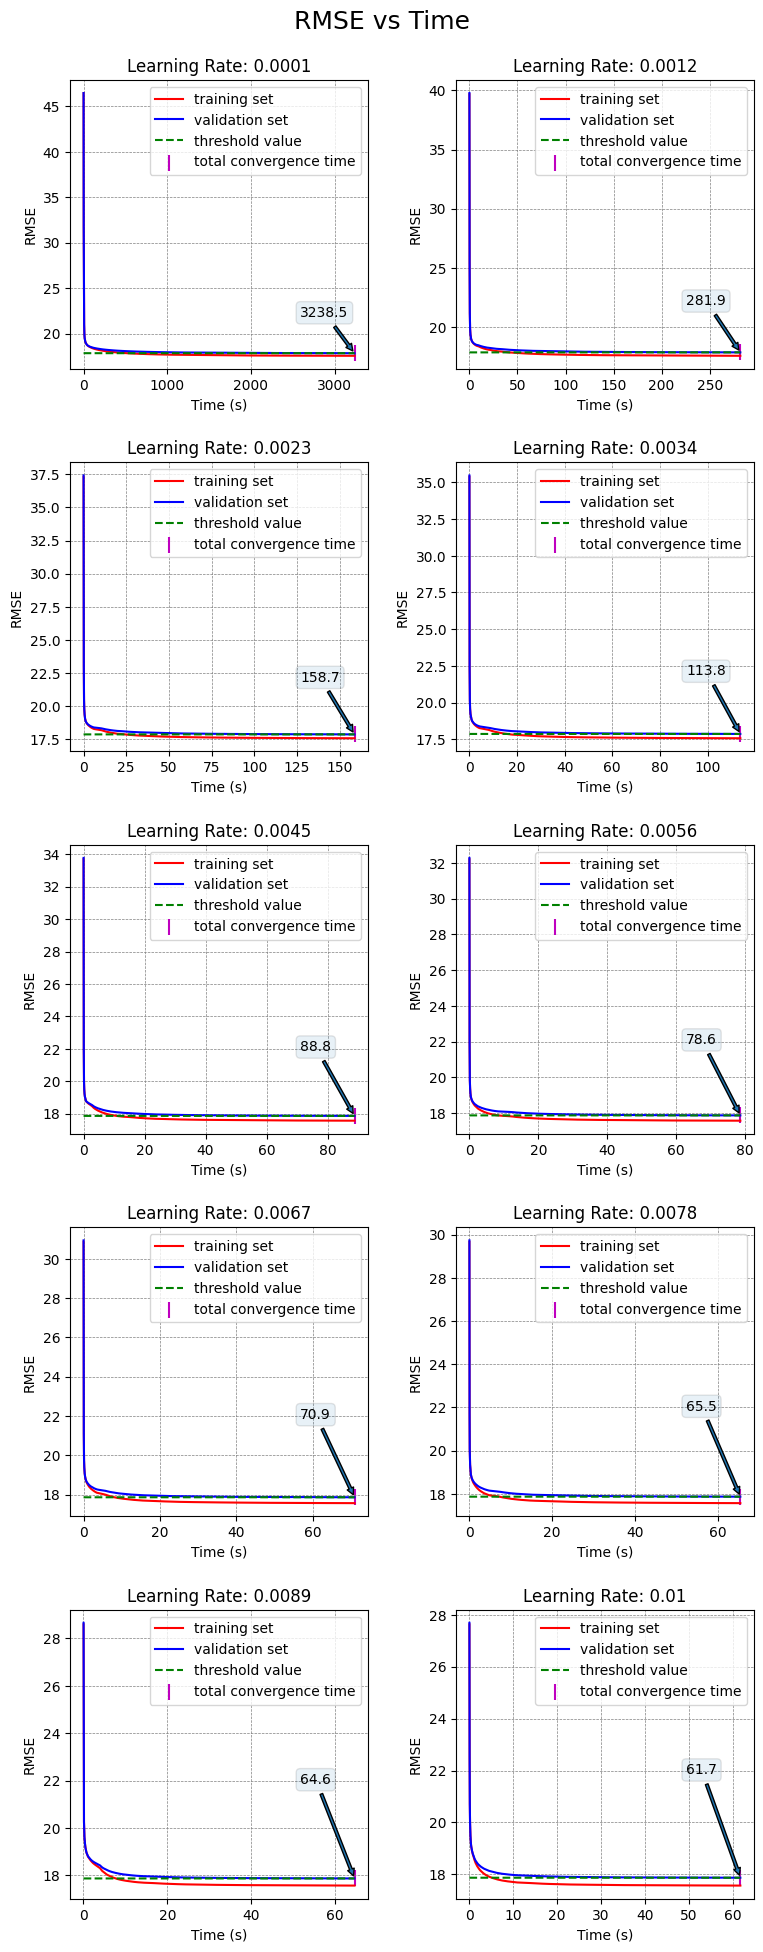

In [ ]:
## Plotting RMSE vs time
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=[8,20])
for i, ax in enumerate(axes.flatten()):
  rmse_train_ = learningRate_sweep_dict[keys[i]]['rmse_train_sgd']
  rmse_valid_ = learningRate_sweep_dict[keys[i]]['rmse_valid_sgd']
  time_       = learningRate_sweep_dict[keys[i]]['TTarr']
  ax.plot(time_,rmse_train_, color='red', label ='training set')
  ax.plot(time_,rmse_valid_, color='blue', label ='validation set')
  ax.plot(time_, CT*np.ones(len(time_)), 'g--', label ='threshold value')
  ax.scatter(time_[-1], rmse_valid_[-1], marker='|', color='m', 
            s=120, label='total convergence time')
  ax.annotate(str(round(time_[-1],1)), (time_[-1], rmse_valid_[-1]), 
              xytext=(time_[-1]*(1-1/5), rmse_valid_[-1]+4), 
              bbox=dict(boxstyle="round", alpha=0.1), 
              arrowprops = dict(arrowstyle="simple"))
  ax.set_title(f'Learning Rate: {round(keys[i],4)}', size=12)
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('RMSE')
  ax.legend(loc='upper right')
  ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
fig.tight_layout(rect=[0, 0, 1, 0.97], pad=2)
fig.suptitle('RMSE vs Time', size=18)
fig.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/W23_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/W23_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 2186006 bytes to /content/W23_APS1070_Project_4.html


## Part 6 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ODb_vtN2 to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-W23/project-4-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-W23/project-4-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W23_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**